In [8]:
"""
Estimation
First-Order Continuous Transfer Function +  Delay   - Tclab

@author: Jeferson Gallego Chaverra
        Pedro Alejandro Sanchez Osorio
        Victor Alfonso Echeverri Moyano
"""
import numpy as np
import matplotlib.pyplot as plt
import control as cl
from sklearn.metrics import *
from Funtions import *
import math as ma

## Estimation
## First-Order Transfer Function +  Delay (FOTFD)

## Upload Data

21 40
30.28


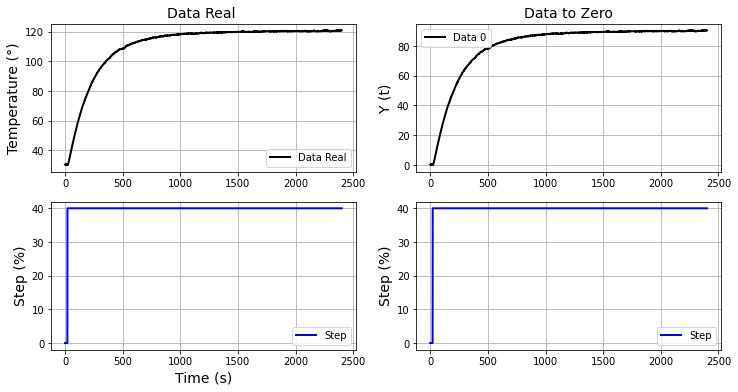

In [9]:
# Upload Data 
x =limites('DATA 1 OR 2?',1,2)

# Data
if x == 1:
     data = np.loadtxt('1.txt',delimiter=',',skiprows=1)
     #I = 25
elif x == 2:
     data = np.loadtxt('2.txt',delimiter=',',skiprows=1)
     #I = 40 

# Tclab Data
t1 = data[:,0].T 
u1 = data[:,1].T
y1 = data[:,2].T

N = len(y1)
# U
U = int(u1[0])

# Time Zero and Step
for k in range(N):
    if(u1[k]!=U):
        T_Zero = int(t1[k])
        I = int(u1[k])
        print(T_Zero,I)
        break

# Y ---> Time Zero
Z = y1[T_Zero]
print(Z,)
y2 = y1 - Z

# Graph
plt.figure(figsize=(12,6))
 
# Subplot Data
ax=plt.subplot(2,2,1)
ax.grid()
plt.title("Data Real ",fontsize = 14)
plt.plot(t1, y1, 'k', linewidth=2, label='Data Real')
plt.ylabel('Temperature (°)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,2)
ax.grid()
plt.title("Data to Zero",fontsize = 14)
plt.plot(t1, y2, 'k', linewidth=2, label='Data 0')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

# Subplot Step          
ax=plt.subplot(2,2,3)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,4)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.legend(loc='best')
plt.show()

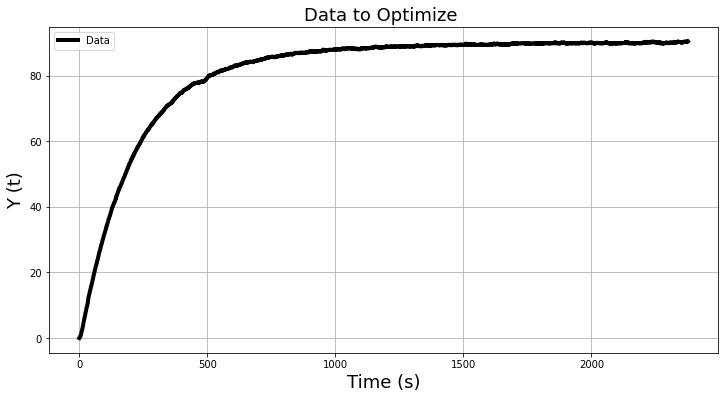

In [10]:
# Simulation Time 
t0 = data[T_Zero:,0].T 
tf = len(t0) - 1
dt = 1
t = np.linspace(0,tf,int(tf/dt)+1)

# Vector Y (t)
y = y2[T_Zero:]

# Iterations
N=len(y)
       
plt.figure(figsize=(12,6))
plt.title("Data to Optimize ",fontsize = 18)
plt.plot(t, y, 'k', linewidth=4, label='Data')
plt.ylabel('Y (t)', fontsize = 18)
plt.xlabel('Time (s)', fontsize = 18)
plt.legend(loc='best')
plt.grid()

## T1 = Time Where Y(t)% 28.3 % 
## T2 = Time Where Y(t)% 63.2 % 

In [11]:
yf = 0
i1 = 0
i2 = 0

# T1
t_1 = np.array([])
y_1 = np.array([])
# T2
t_2 = np.array([])
y_2 = np.array([])

# Final Value
V = y[-1]

# T1 = 28.3% Final Value(Real)
V1 = 0.283*V
# T2 = 63.2% Final Value(Real)
V2 = 0.632*V

# T1
for k in range(N):
    if(y[k]>=V1):
        t_1 = np.append(t_1,t[k-1])
        t_1 = np.append(t_1,t[k])
        y_1 = np.append(y_1,y[k-1])
        y_1 = np.append(y_1,y[k])
        break

y_interp_1 = interp1d(y_1, t_1)
T1 = y_interp_1(V1)
print(y_1,V1,t_1,T1)

# T2
for k in range(N):
    if(y[k]>=V2):
        t_2 = np.append(t_2,t[k-1])
        t_2 = np.append(t_2,t[k])
        y_2 = np.append(y_2,y[k-1])
        y_2 = np.append(y_2,y[k])
        break

y_interp_2 = interp1d(y_2, t_2)
T2 = y_interp_2(V2)
print(y_2,V2,t_2,T2)

# Determinante Tau y Theta 
matrix= np.array([[1,(1/3)],
                   [1,1]])

vector= np.array([T1,T2])

theta,tau = crammer_2(matrix,vector)

ts = 4*tau

# Final U
if x==1:
    uf= 25
elif x == 2:
    uf = 40

# K 
Kf = (V)/(uf)

print(f" K: {Kf:.4f} - Tau: {tau:.4f} - Theta: {theta:.4f} - tss: {ts:.4f}")


[25.39 25.64] 25.61433 [76. 77.] 76.89732
[57.03 57.28] 57.20232 [220. 221.] 220.68928
 K: 2.2628 - Tau: 215.6879 - Theta: 5.0013 - tss: 862.7518


G(s) =     
   2.263
-----------
215.7 s + 1

e^  - 5.0013
Mean Squared Error              =  1.7180
Root Mean Squared Error         =  1.3107
Mean Absolute Error             =  1.1635
Mean Absolute Percentage Error  =  0.0291
R2                              =  0.9945
MAX Error                       =  2.8013


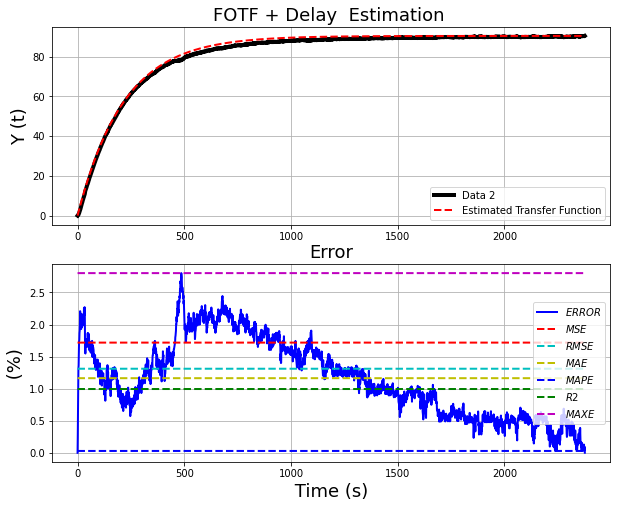

In [12]:
# Approximate Transfer Function:
Ge = cl.tf([Kf],[tau,1])

# Step Response 
_,ye = cl.step_response(Ge,t)

# Final Ye
if x==1:
     ye = ye * 25
elif x == 2:
     ye = ye * 40

# Error
e = np.abs(y - ye)

# Evaluation Criteria 
MSE = mean_squared_error(y[0:len(ye)], ye[0:len(ye)])
RMSE=ma.sqrt(MSE)
MAE = mean_absolute_error(y[0:len(ye)], ye[0:len(ye)])
MAPE = mean_absolute_percentage_error(y[0:len(ye)], ye[0:len(ye)])
R2 = r2_score(y[0:len(ye)], ye[0:len(ye)])
MAXE = max_error(y[0:len(ye)], ye[0:len(ye)])

# Print
print(f"G(s) =     {Ge}") 
print(f"e^  - {theta:.4f}")
print(f"Mean Squared Error              =  {MSE:.4f}")
print(f"Root Mean Squared Error         =  {RMSE:.4f}")
print(f"Mean Absolute Error             =  {MAE:.4f}")
print(f"Mean Absolute Percentage Error  =  {MAPE:.4f}")
print(f"R2                              =  {R2:.4f}")
print(f"MAX Error                       =  {MAXE:.4f}")

# Graph
mse = np.ones(int(len(t)))*MSE 
rmse = np.ones(int(len(t)))*RMSE
mae = np.ones(int(len(t)))*MAE 
mape = np.ones(int(len(t)))*MAPE 
r2 = np.ones(int(len(t)))*R2 
maxe = np.ones(int(len(t)))*MAXE 

# Plot
plt.figure(figsize=(10,8))

ax=plt.subplot(2,1,1)
ax.grid()
plt.title( "FOTF + Delay  Estimation ",fontsize = 18)
plt.plot(t,y, 'k', linewidth=4, label='Data 2')
plt.plot(t,ye, 'r--'  , linewidth=2, label='Estimated Transfer Function')
plt.ylabel('Y (t)', fontsize = 18)
plt.legend(loc='best')

ax=plt.subplot(2,1,2)
ax.grid()
plt.title("Error",fontsize = 18)
plt.plot(t,e,  'b-'  , linewidth=2, label=r'$ERROR$')
plt.plot(t,mse,  'r--'  , linewidth=2, label=r'$MSE$')
plt.plot(t,rmse,  'c--'  , linewidth=2, label=r'$RMSE$')
plt.plot(t,mae,  'y--'  , linewidth=2, label=r'$MAE$')
plt.plot(t,mape,  'b--'  , linewidth=2, label=r'$MAPE$')
plt.plot(t,r2,  'g--'  , linewidth=2, label=r'$R2$')
plt.plot(t,maxe,  'm--'  , linewidth=2, label=r'$MAXE$')
plt.ylabel(' (%) ', fontsize = 18)
plt.xlabel(' Time (s) ', fontsize = 18)
plt.legend(loc='best')

In [13]:
"""
https://
tableroalparque.weebly.com/uploads/5/1/6/9/51696511/5_identificacion_de_procesos_y_curva_de_reaccion.pdf

Data 1: 20 % Step

Ge =     
   2.274
-----------
234.3 s + 1

e^  - 3.9158
Mean Squared Error              =  0.8278
Root Mean Squared Error         =  0.9099
Mean Absolute Error             =  0.7399
Mean Absolute Percentage Error  =  0.0367
R2                              =  0.9936
MAX Error                       =  2.5779

Data 2: 40 % Step

Ge =     
   2.263
-----------
215.7 s + 1

e^  - 5.0013
Mean Squared Error              =  1.7180
Root Mean Squared Error         =  1.3107
Mean Absolute Error             =  1.1635
Mean Absolute Percentage Error  =  0.0291
R2                              =  0.9945
MAX Error                       =  2.8013
"""


'\nhttps://\ntableroalparque.weebly.com/uploads/5/1/6/9/51696511/5_identificacion_de_procesos_y_curva_de_reaccion.pdf\n\nData 1: 20 % Step\n\nGe =     \n   2.274\n-----------\n234.3 s + 1\n\ne^  - 3.9158\nMean Squared Error              =  0.8278\nRoot Mean Squared Error         =  0.9099\nMean Absolute Error             =  0.7399\nMean Absolute Percentage Error  =  0.0367\nR2                              =  0.9936\nMAX Error                       =  2.5779\n\nData 2: 40 % Step\n\nGe =     \n   2.263\n-----------\n215.7 s + 1\n\ne^  - 5.0013\nMean Squared Error              =  1.7180\nRoot Mean Squared Error         =  1.3107\nMean Absolute Error             =  1.1635\nMean Absolute Percentage Error  =  0.0291\nR2                              =  0.9945\nMAX Error                       =  2.8013\n'